# Playground

In [2]:
import  numpy as np
import networkx as nx

np.set_printoptions(precision=3)
n=10
p=0.1

A_prob = np.random.rand(n,n)
print(A_prob)

A = (A_prob < p).astype('int')
print(A)

[[0.039 0.091 0.826 0.029 0.448 0.069 0.723 0.91  0.501 0.266]
 [0.524 0.41  0.481 0.664 0.698 0.439 0.19  0.565 0.493 0.153]
 [0.927 0.092 0.857 0.82  0.828 0.478 0.323 0.785 0.607 0.761]
 [0.015 0.472 0.149 0.604 0.128 0.966 0.699 0.273 0.327 0.589]
 [0.708 0.148 0.454 0.936 0.294 0.408 0.902 0.593 0.398 0.514]
 [0.223 0.942 0.303 0.773 0.207 0.136 0.816 0.854 0.95  0.687]
 [0.458 0.663 0.729 0.036 0.362 0.593 0.872 0.531 0.383 0.641]
 [0.713 0.969 0.996 0.038 0.956 0.142 0.073 0.324 0.363 0.506]
 [0.632 0.175 0.657 0.525 0.068 0.581 0.27  0.205 0.684 0.325]
 [0.16  0.748 0.07  0.246 0.688 0.856 0.944 0.56  0.029 0.026]]
[[1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1]]


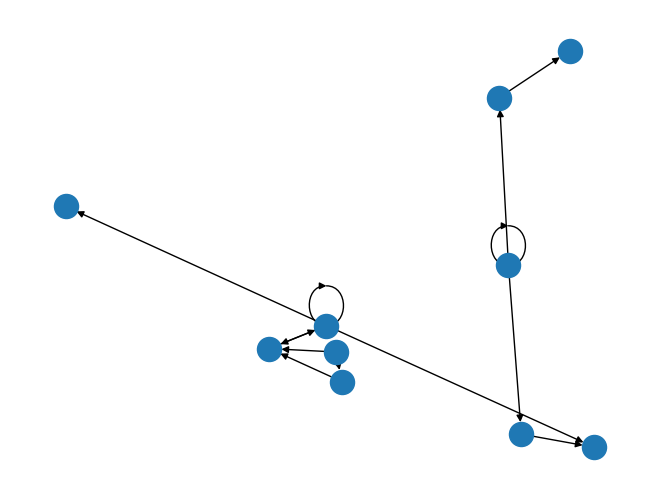

In [8]:
G = nx.DiGraph(np.array(A))
# G = nx.from_numpy_array(A)
nx.draw(G)

# Erdos-Reyni-Network

In [17]:
import csv

# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            # file.write(f"{edge[0]},{edge[1]}\n")
            writer.writerow(edge)

#Example usage: Generate an Erdos-Renyi graph with 10,000 nodes and edge probability 0.1 and save it to erdos_reyni_network.csv
num_nodes = 10_000
probability = 0.1
ERY_filename = 'erdos_reyni_network.csv'

erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)
print(f"Erdos-Renyi graph generated successfully with {num_nodes} nodes and edge probability {probability} saved to {ERY_filename}!")

Erdos-Renyi graph generated successfully with 10000 nodes and edge probability 0.1 saved to erdos_reyni_network.csv!


In [14]:
import random

# Reading the above network generated file 
def load_graph_from_csv(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p, inital_infected):
    infected = set(inital_infected)
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in infected:
            neighbors = list(graph.neighbors(node))
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if random.random() < p:
                    new_infected.add(neighbor)
        
        infected.update(new_infected)
        rounds += 1
    return rounds

In [18]:
# Main function to run the simulation
def main():
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p = float(input("Enter the probability value (p): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    graph = load_graph_from_csv(filename)

    num_simulations = 10
    total_time = 0
    for _ in range(num_simulations):
        time_taken = simulate_infection(graph, p, initial_infected)
        total_time += time_taken

    average_time = total_time / num_simulations
    print("Average time taken to infect all nodes:", average_time)

if __name__ == "__main__":
    main()

Average time taken to infect all nodes: 2.0
